<a href="https://colab.research.google.com/github/ChangeEngine/Intro-to-ML--Group-1--Final-Project/blob/main/notebooks/01_data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from pathlib import Path

# Try to locate the data/ folder.
DATA_DIR = Path("data")
if not DATA_DIR.exists():
    DATA_DIR = Path("..") / "data"

print("Using data folder:", DATA_DIR.resolve())
print("Files in data/:")
for p in DATA_DIR.iterdir():
    print(" -", p.name)


Using data folder: /content/Intro-to-ML--Group-1--Final-Project/data
Files in data/:
 - train-labels.idx1-ubyte.gz
 - t10k-labels.idx1-ubyte.gz
 - train-images.idx3-ubyte.gz
 - t10k-images.idx3-ubyte.gz


In [ ]:
import gzip
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

plt.rcParams["figure.figsize"] = (4, 4)


train_images_path = DATA_DIR / "train-images.idx3-ubyte.gz"
train_labels_path = DATA_DIR / "train-labels.idx1-ubyte.gz"
test_images_path  = DATA_DIR / "t10k-images.idx3-ubyte.gz"
test_labels_path  = DATA_DIR / "t10k-labels.idx1-ubyte.gz"

print(train_images_path)
print(train_labels_path)
print(test_images_path)
print(test_labels_path)


data/train-images.idx3-ubyte.gz
data/train-labels.idx1-ubyte.gz
data/t10k-images.idx3-ubyte.gz
data/t10k-labels.idx1-ubyte.gz


In [ ]:
def load_mnist_images(path):
    # idx3-ubyte.gz: first 16 bytes = header
    with gzip.open(path, "rb") as f:
        data = f.read()

    header = np.frombuffer(data[:16], dtype=">i4")
    magic, num_images, rows, cols = header
    assert magic == 2051, "Not an images file"

    images = np.frombuffer(data[16:], dtype=np.uint8)
    images = images.reshape(num_images, rows, cols)
    return images


def load_mnist_labels(path):
    # idx1-ubyte.gz: first 8 bytes = header
    with gzip.open(path, "rb") as f:
        data = f.read()

    header = np.frombuffer(data[:8], dtype=">i4")
    magic, num_labels = header
    assert magic == 2049, "Not a labels file"

    labels = np.frombuffer(data[8:], dtype=np.uint8)
    return labels


def load_mnist_dataset(images_path, labels_path, normalize=True):
    X = load_mnist_images(images_path)
    y = load_mnist_labels(labels_path)

    if normalize:
        X = X.astype("float32") / 255.0

    return X, y


In [ ]:
X_train, y_train = load_mnist_dataset(train_images_path, train_labels_path)
X_test, y_test   = load_mnist_dataset(test_images_path, test_labels_path)

print("X_train:", X_train.shape, X_train.dtype)
print("y_train:", y_train.shape, y_train.dtype)
print("X_test :", X_test.shape, X_test.dtype)
print("y_test :", y_test.shape, y_test.dtype)


X_train: (60000, 28, 28) float32
y_train: (60000,) uint8
X_test : (10000, 28, 28) float32
y_test : (10000,) uint8


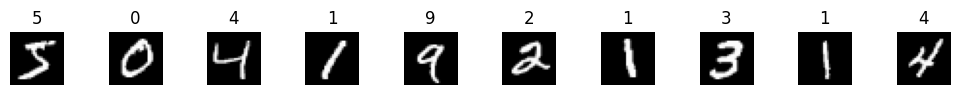

In [ ]:
import matplotlib.pyplot as plt

def show_examples(images, labels, n=10):
    plt.figure(figsize=(n, 1))
    for i in range(n):
        plt.subplot(1, n, i + 1)
        plt.imshow(images[i], cmap="gray")
        plt.axis("off")
        plt.title(int(labels[i]))
    plt.tight_layout()
    plt.show()

show_examples(X_train, y_train, n=10)


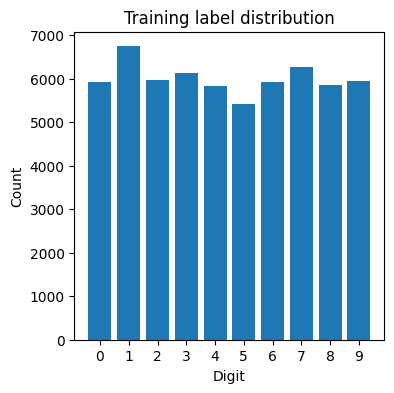

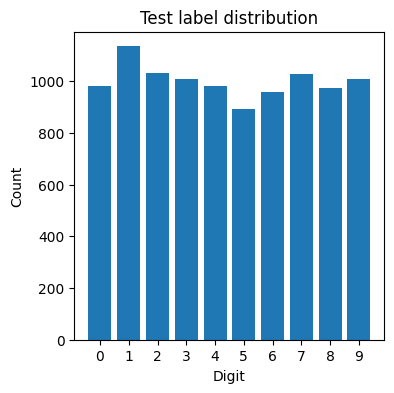

In [ ]:
from collections import Counter

def plot_label_distribution(labels, title):
    counts = Counter(int(l) for l in labels)
    xs = sorted(counts.keys())
    ys = [counts[x] for x in xs]

    plt.bar(xs, ys)
    plt.xlabel("Digit")
    plt.ylabel("Count")
    plt.title(title)
    plt.xticks(xs)
    plt.show()

plot_label_distribution(y_train, "Training label distribution")
plot_label_distribution(y_test, "Test label distribution")
